<a href="https://colab.research.google.com/github/BrunoAzambuja/Regressao_para_previsao_de_custos_em_seguros_de_vida/blob/main/Regress%C3%A3o_para_previs%C3%A3o_de_custos_em_seguros_de_vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão para previsão de custo do seguro de vida
#### Modelos de machine learning aplicados em previsões de custos.

*by [Bruno Azambuja](www.brunoazambuja.com)*


**Seguros de vida**

A precificação de seguros de vida individual é uma tarefa vital para a continuidade em longo prazo do negócio, principalmente por conta da alta competitividade e as constantes mudanças econômicas.

Contudo, a precificação de seguros de vida individual se torna uma tarefa difícil considerando que isso se baseia em cálculos complexos, demandando a consideração de diversas variáveis para se obter as melhores estimativas. 

Desta forma, as técnicas de *Machine Learning* aplicadas em projeto de regressão podem se tornar ferramentas muito eficazes para o desenvolvimento de trabalhos nesta área.

<p align="center"><img src="https://loretolife.com.br/wp-content/uploads/2018/12/rhg.jpg" width="80%"></p>

# Entendendo os objetivos

O objetivo deste projeto é desenvolver uma solução de *Machine Learning* eficiente de regressão para prever o custo do seguro de vida individual. 

Além disso, veremos quais *insights* podem ser extraídos a partir de uma análise exploratória. 

# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

In [ ]:
# instalando a biblioteca
!pip install pycaret -q
!pip install shap

In [ ]:
# importando os pacotes necessários
import plotly.graph_objects as go
import plotly.offline as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xgboost as xgb
import shap
import joblib
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from PIL import Image
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from pycaret.utils import enable_colab 
enable_colab()
import warnings
warnings.filterwarnings("ignore")

Colab mode enabled.


# Importando os dados

Os dados utilizados neste estudo foram disponibilizados na plataforma Kaggle pelo dataset ["*Health Insurance Cost Prediction*"](https://www.kaggle.com/annetxu/health-insurance-cost-prediction), nele é possível acessar os dados fonte.

**Importando os dados**

In [ ]:
# importando os dados para um dataframe
path = ('/content/insurance.csv')
df = pd.read_csv(path)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Dicionário das variáveis:

    * `age` - idade do segurado;
    * `sex` - gênero do segurado;
    * `bmi` - body mass index ou IMC (índice de massa corporal);
    * `children` - quantidade de filhos;
    * `smoker` - fumante;
    * `region` - localidade de residência;
    * `charges` - custos médicos individuais.

Com os dados importados para dentro de uma estrutura *dataframe*, pode-se iniciar uma análise exploratória dos dados a fim de buscar insights propostos inicialmente.

# Análise exploratória

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do dataset "*Health Insurance Cost Prediction*". Sendo assim, a análise exploratória tem por objetivo  permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

###**Características dataset**


Com os dados importados, conseguimos fazer uma análise visual identificando suas principais caracteríscas, para que assim possamos preparar os dados para os modelos. Primeiramente vamos gerar as primeiras e últimas entradas, assim como o número de linhas e colunas que o *dataset* apresenta.

In [ ]:
# vendo as primeiras e últimas entradas
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# checando as caracteriticas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###**Balanceamentos**

Aqui podemos entender o balanceamento do atributo **SEX**:

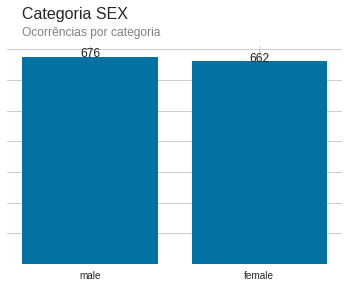

In [ ]:
# gerando dataset
sex_count = df['sex'].value_counts(dropna = False)

# gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sex_count.index, sex_count.values, data=sex_count)
plt.title("Categoria SEX", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Ocorrências por categoria", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

Como podemos ver no gráfico acima, os valores de cada categorias estão próximos.

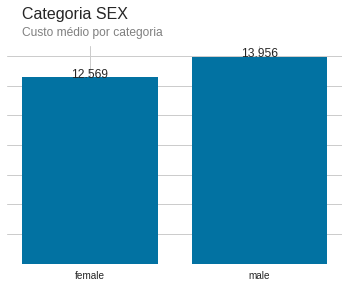

In [ ]:
# gerando dataset
mean_cost_sex = df[['sex', 'charges']].groupby('sex', as_index = False).mean()

# # gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(mean_cost_sex['sex'], mean_cost_sex['charges'], data=mean_cost_sex)
plt.title("Categoria SEX", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Custo médio por categoria", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

Observando o gráfico acima, podemos ver que os custos médios são maiores nos homens do que nas mulheres.

Aqui podemos entender o balanceamentodo do atributo **SMOKER**:

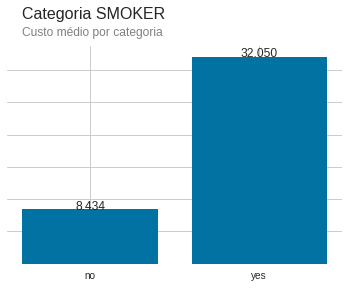

In [ ]:
# gerando dataset
mean_cost_smoker = df[['smoker', 'charges']].groupby('smoker', as_index = False).mean()

# # gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(mean_cost_smoker['smoker'], mean_cost_smoker['charges'], data=mean_cost_smoker)
plt.title("Categoria SMOKER", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Custo médio por categoria", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

A partir do gráfico acima, podemos ver que os custos médios são mais altos para um indivíduo que fuma do que para os não fumantes.

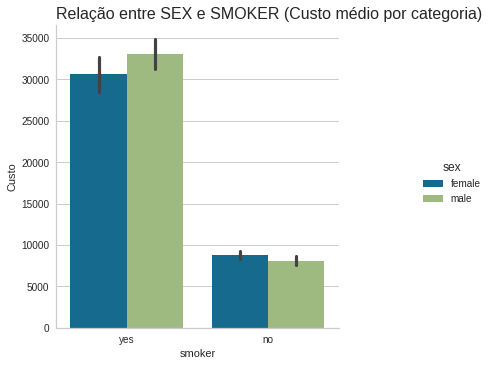

In [ ]:
# gerando o gráfico
sns.catplot(x = 'smoker', y = 'charges', hue = 'sex', data = df, kind = 'bar')
plt.ylabel('Custo')
plt.title("Relação entre SEX e SMOKER (Custo médio por categoria)", fontsize=16, x=0, y=2.5, loc="left");

A partir do gráfico acima, podemos ver que as pessoas do sexo masculino fumam mais.

Aqui podemos entender o balanceamentodo do atributo **REGION**:

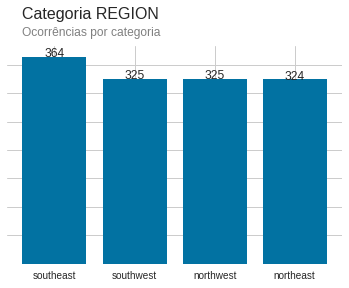

In [ ]:
# gerando dataset
region_count = df['region'].value_counts(dropna = False)

# # gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(region_count.index, region_count.values, data=region_count)
plt.title("Categoria REGION", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Ocorrências por categoria", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

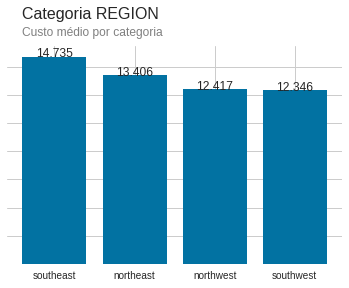

In [ ]:
# gerando dataset
mean_cost_region = df[['region', 'charges']].groupby('region', as_index = False).mean().sort_values('charges', ascending=False)

# # gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(mean_cost_region['region'], mean_cost_region['charges'], data=mean_cost_region)
plt.title("Categoria REGION", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Custo médio por categoria", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

No gráfico acima, podemos observar uma diferença considerável de custo médio entre as regiões.

###**Distribuições**

Abaixo podemos visualizar a distribuição dos dados assim como seus respectivos outliers. O objetivo desta análise exploratória é visualizar a distribuição de diversos *features*: `age`, `bmi`, `children` e `charges`.

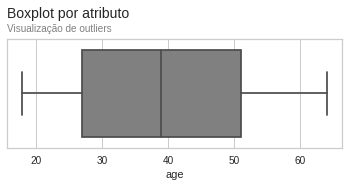

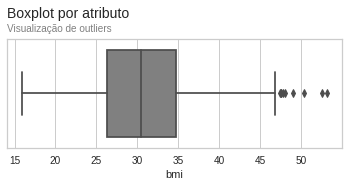

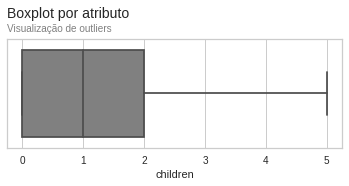

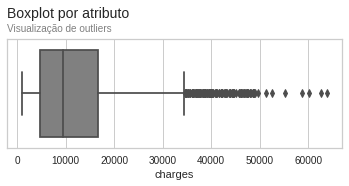

In [ ]:
# gerando o gráfico
x = df.drop(['sex','smoker','region'],axis = 1)
for i in x.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x = i, data = x,color = 'gray')
    plt.xlabel(i)

# adicionando títulos
    plt.title("Boxplot por atributo", fontsize=14, x=0, y=1.145, loc="left")
    plt.suptitle("Visualização de outliers", color = "gray", fontsize=10, x=0.125, y=0.99, ha="left");

# plotando o gráfico
    plt.show()

Como podemos ver, os *features* apresentam diversas distribuições, sendo que somente os atributos `bmi` e `charges` apresentam dados com outliers.

Agora vamos analisar os encargos médicos por idade, IMC e filhos de acordo com o fator tabagismo. No gráfico abaixo que nos mostra a relação entre `charges` e `age` podemos ver uma diferenciação entre o grupo fumante e o não fumante.

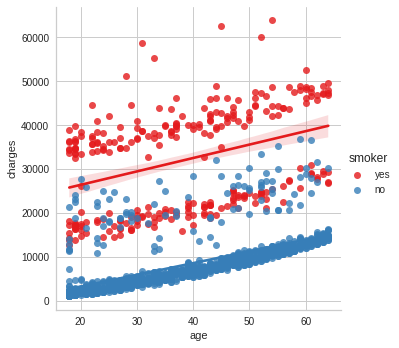

In [ ]:
# gerando os gráficos
ax1 = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')

No gráfico abaixo que nos mostra a relação entre `charges` e `bmi` podemos ver uma diferenciação entre o grupo fumante e o não fumante:

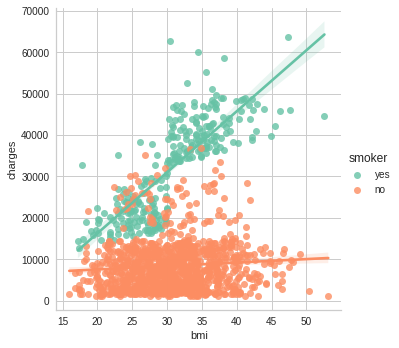

In [ ]:
# gerando os gráficos
ax2 = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')

No gráfico abaixo que nos mostra a relação entre `charges` e `children`, também, podemos ver uma diferenciação entre o grupo fumante e o não fumante:

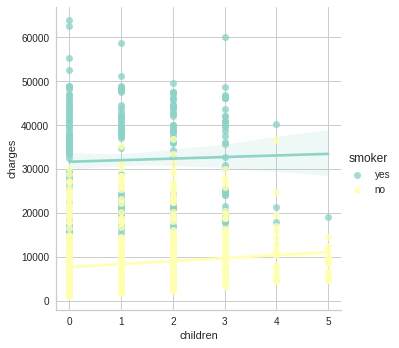

In [ ]:
ax3 = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Aqui podemos entender a distribuição do atributo **AGE**:

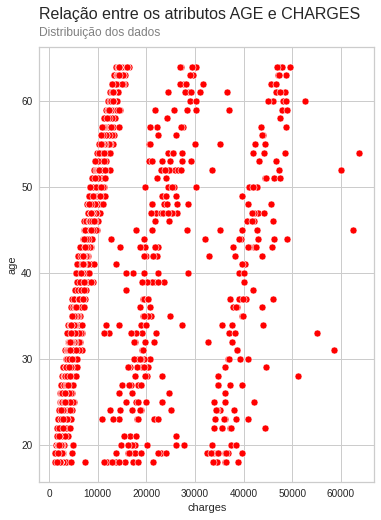

In [ ]:
# gerando o gráfico
plt.figure(figsize=(6,8))
sns.scatterplot(x = 'charges' ,y = 'age', data = df, color = 'red')
plt.title("Relação entre os atributos AGE e CHARGES", fontsize=16, x=0, y=1.05, loc="left")
plt.suptitle("Distribuição dos dados", color = "gray", fontsize=12, x=0.125, y=0.915, ha="left");
plt.show()

Pelo o que podemos ver, o gráfico acima nos mostra que na medida em que se avança os valores de `age`, os valores mínimos do `charges`aumentam, ou seja, quanto maior idade dos clientes maior serão os custos do seguro. 

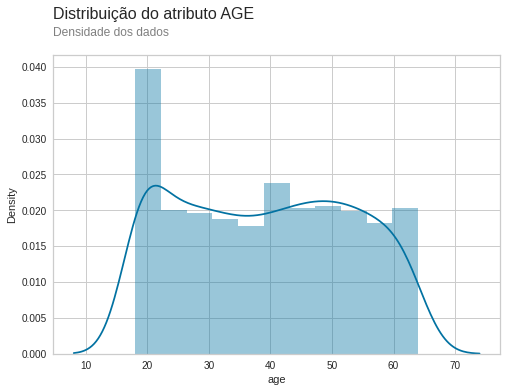

In [ ]:
# gerando o gráfico
sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.title("Distribuição do atributo AGE", fontsize=16, x=0, y=1.1, loc="left")
plt.suptitle("Densidade dos dados", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left");

No gráfico acima, podemos ver que maior concentração de clientes do *dataset* está com idade entre 20 e 60.

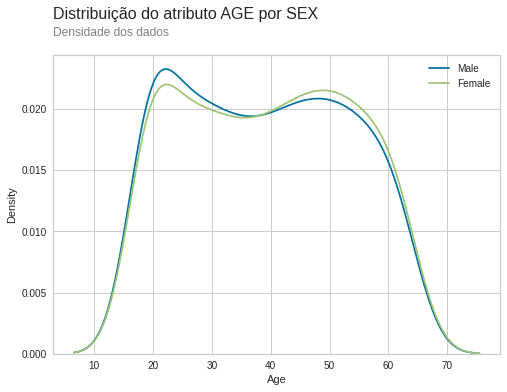

In [ ]:
# gerando o gráfico
sns.kdeplot(df['age'][df['sex'] == 'male'], label = 'Male')
sns.kdeplot(df['age'][df['sex'] == 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title("Distribuição do atributo AGE por SEX", fontsize=16, x=0, y=1.1, loc="left")
plt.suptitle("Densidade dos dados", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left");

Como podemos ver, os gráficos acima indicam que há similaridade entre a categoria SEX conforme as idades. Assim como, uma maior concentração de usuários entre as idades de 20 e 60.

Aqui podemos entender a distribuição do atributo **BMI** (índice de massa corporal):

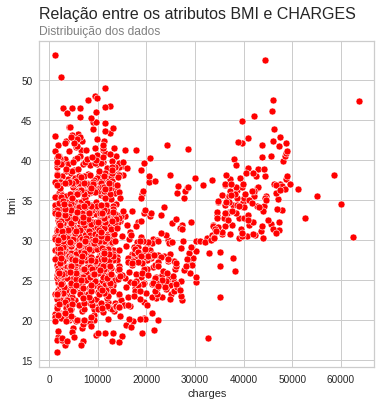

In [ ]:
# gerando o gráfico
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'charges' ,y = 'bmi', data = df, color = 'red')
plt.title("Relação entre os atributos BMI e CHARGES", fontsize=16, x=0, y=1.05, loc="left")
plt.suptitle("Distribuição dos dados", color = "gray", fontsize=12, x=0.125, y=0.915, ha="left");
plt.show()

O gráfico acima, nos mostra que há uma ddispersão dos dados, sendo que entre os clientes com o `charges` mais elevado, principalmente acima de 30.000 charges, apresentam um valor mais elevado de `ibm`.

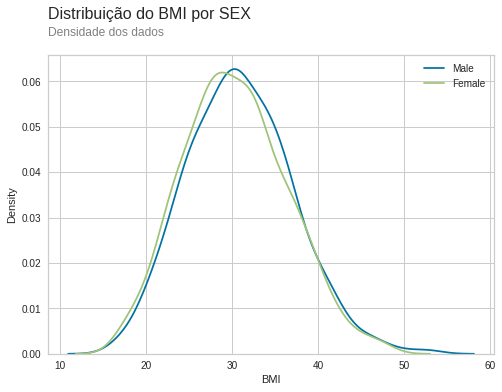

In [ ]:
# gerando o gráfico
sns.kdeplot(df['bmi'][df['sex'] == 'male'], label = 'Male')
sns.kdeplot(df['bmi'][df['sex'] == 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title("Distribuição do BMI por SEX", fontsize=16, x=0, y=1.1, loc="left")
plt.suptitle("Densidade dos dados", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left");

Conforme o gráfico acima, podemos ver que ambos os gráficos apresentam similaridade, onde as curvas do gráfico apresentam somente um ligeiro deslocamento para a direita.

Aqui podemos entender a distribuição do atributo **CHILDREN**:

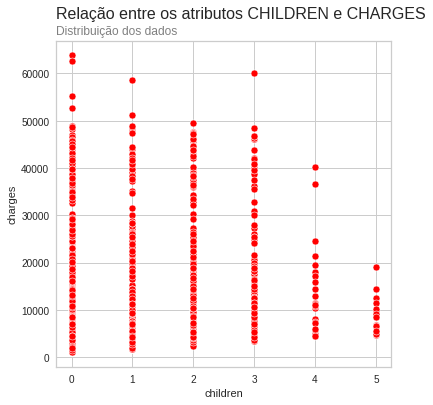

In [ ]:
# gerando o gráfico
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'children' ,y = 'charges', data = df, color = 'red')
plt.title("Relação entre os atributos CHILDREN e CHARGES", fontsize=16, x=0, y=1.05, loc="left")
plt.suptitle("Distribuição dos dados", color = "gray", fontsize=12, x=0.125, y=0.915, ha="left");
plt.show()

Como podemos ver acima, o gráfico no mostra que há um padrão de distribuição dos dados entre os clientes com o número de filhos entre 0 e 3, apresentando uma redução somente entre os clientes com 4 e 5 filhos.

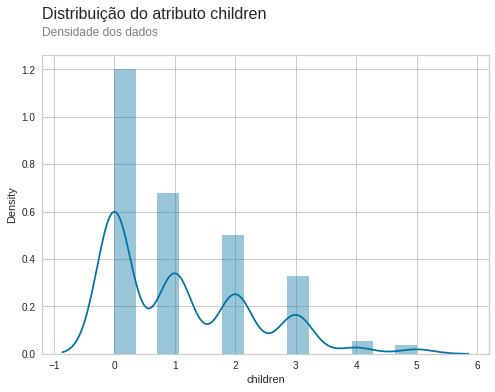

In [ ]:
# gerando o gráfico
sns.distplot(df['children'], label = 'Skewness: %.2f'%(df['children'].skew()))
plt.title("Distribuição do atributo children", fontsize=16, x=0, y=1.1, loc="left")
plt.suptitle("Densidade dos dados", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left");

Conforme o gráfico acima, podemos ver que ele é ligeiramente assimétrico. Reduzindo a incidência de crianças na medida em que aumenta a quantidade de chianças por usuário.

Aqui podemos entender a distribuição do atributo **CHARGES**:

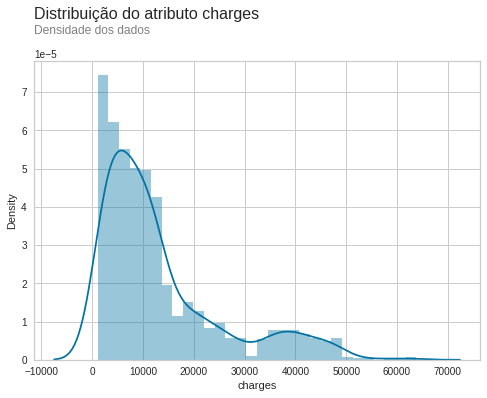

In [ ]:
# gerando o gráfico
sns.distplot(df['charges'], label = 'Skewness: %.2f'%(df['charges'].skew()))
plt.title("Distribuição do atributo charges", fontsize=16, x=0, y=1.12, loc="left")
plt.suptitle("Densidade dos dados", color = "gray", fontsize=12, x=0.125, y=0.97, ha="left");

Como podemos ver acima, o maior número de clientes está com valores de `charges`entre 0 e 15.000.

###**Correlações**

**Correlação** significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

Este foi o critério utilizado como base para avaliarmos o nível de correlação entre as variáveis.

<center><img alt="pearson" width="30%" src="http://3.bp.blogspot.com/_HqjPVvZ1cRI/R_O_zshrecI/AAAAAAAABOQ/oMLkaCX5l7c/s400/corel-interpretacao.gif"></center>

Primeiramente criei uma matriz que demonstra a correlação entre as variáveis definidas:

In [ ]:
# criar uma matriz de correlação
corr = df.corr()

# mostrar a matriz de correlação
display(corr)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


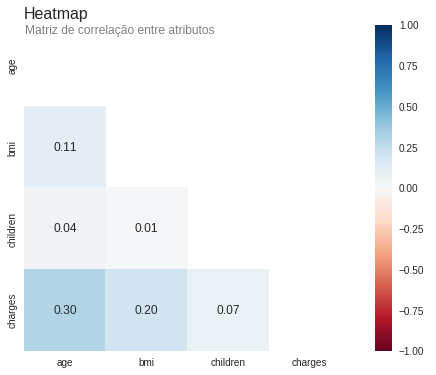

In [ ]:
# plotar um heatmap a partir das correlações
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# definindo parâmetros
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', mask=mask, vmax=1, vmin=-1, square=True, annot=True)

# adicionando títulos
plt.title("Heatmap", fontsize=16, x=0, y=1.5, loc="left")
plt.suptitle("Matriz de correlação entre atributos", color = "gray", fontsize=12, x=0.243, y=0.88, ha="left");

Conforme podemos ver, a matriz de correlação acima indica que a maior correlação encontrada a respeito da variável alvo foi de 0.30, o que é uma correlação fraca positiva entre o `changes`e o `age`. Os demais atributos também indicaram correlações fracas e positivas.

Além disso, na etapa de **construção do modelo** será realizado uma análise chamada *feature importances*. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

# Preparando os dados

Esta etapa consiste em preparar nosso conjunto de dados para a construção do modelo. Nesta seção, executaremos as seguintes etapas de tratamento dos dados:

* Limpeza dos dados:
  * Preencher ou eliminar as linhas com valores faltantes;
  * Eliminar valores duplicados;
  * Tratar ou remover outliers.
* *Feature Engineering*:
  * Discretizar variáveis contínuas;
  * Decompor *features* categóricas;
  * Aplicar transformações às variáveis;
  * Agregar *features* para gerar novas.
* Seleção dos atributos:
  * Eliminar os *features* (atributos) que não contêm informações úteis.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento e teste.

Primeiramente vamos gerar um novo *dataframe* onde será aplicado todo tratamento proposto.

In [ ]:
# gerando dataframe
df_clean = df.copy()

###**Limpeza dos dados**

Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes.

**Valores ausentes**

Na função abaixo, conseguimos verificar que não há valores ausentes neste *dataset*.

In [ ]:
# checando os valores ausentes
df_clean.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Quanto à qualidade do dataset, este não apresentou valores ausentes nas suas respectivas colunas.

**Valores duplicados**

Esta é uma etapa importante à ser verificada para reduzirmos os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df_clean[df_clean.duplicated().values]
duplicated

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Como podemos observar o dataset apresentou dados duplicados, para que esta informação não influencie no objetivo proposto deste estudo, vamos removê-los. Este tratamento pode ser visualizado na sequência.

In [ ]:
# removendo os dados duplicados
df_clean.drop([581],axis = 0,inplace = True)

# resetando o índice do dataset
df_clean.reset_index(inplace = True,drop=True)

###**Feature Engineering**

**Features categóricas**

O tratamento de variáveis categóricas consiste em transformar dados categóricos em um conjunto de dados em dados numéricos. É essencial que executemos a codificação de recursos porque a maioria dos modelos de *machine learning* só pode interpretar dados numéricos e não dados em forma de texto.

Primeiramente irei buscar os valores únicos por coluna, especificamente isso vai auxiliar na identificação das variáveis potencialmente categóricas. Para mais informações quanto ao tratamento de variáveis categórias, acesse este artigo que elaborei para o [Medium](https://medium.com/@brunoazambuja_78996/feature-engineering-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-1335c37ace5b).

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_clean.nunique()))

Valores únicos (por coluna):
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64



Com isso usaremos *Dummies* em nosso dataset aplicando nas colunas `children`, `sex`, `smoker` e `region`.

In [ ]:
# aplicado feature encoding
df_clean = pd.get_dummies(data = df_clean, columns = ['children', 'sex', 'smoker', 'region'])

# verificando o dataset novamente
df_clean.head()

,age,bmi,charges,children_0,children_1,children_2,children_3,children_4,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,28,33.000,4449.46200,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,1,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,1,0,0,1,0,0


Demais transformações de *Feature Engineering* propostas inicialmente não são necessárias.

In [ ]:
# checando as caracteriticas dos dados
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   charges           1337 non-null   float64
 3   children_0        1337 non-null   uint8  
 4   children_1        1337 non-null   uint8  
 5   children_2        1337 non-null   uint8  
 6   children_3        1337 non-null   uint8  
 7   children_4        1337 non-null   uint8  
 8   children_5        1337 non-null   uint8  
 9   sex_female        1337 non-null   uint8  
 10  sex_male          1337 non-null   uint8  
 11  smoker_no         1337 non-null   uint8  
 12  smoker_yes        1337 non-null   uint8  
 13  region_northeast  1337 non-null   uint8  
 14  region_northwest  1337 non-null   uint8  
 15  region_southeast  1337 non-null   uint8  
 16  region_southwest  1337 non-null   uint8  


###**Seleção de atributos**

Esta etapa consiste em identificar a necessidade da eliminação de atributos (features) que não contêm informações úteis. Por conta do tratamento implementado no *dataset* todos podem apresentar relevância para o objetivo proposto do estudo. Desta forma manteremos todos os atributos em nosso *dataset* à ser utilizado no modelo de regressão. 

###**Spliting data**

Lembre-se que os dados de teste não podem ser usados para treinar o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões.
Sendo assim, iremos realizar o *split*.

In [ ]:
# separar a feature matrix da target vector
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# verificando o formato dos conjuntos
print("Formato dataset orginal", df_clean.shape)
print("Formato dataset de treino", X.shape)
print("Formato dataset de teste", y.shape)

Formato dataset orginal (1337, 17)
Formato dataset de treino (1337, 16)
Formato dataset de teste (1337,)


# Modelos de Machine Learning

*Machine Learning* (aprendizado de máquina) é o ramo da Inteligência Artificial que possibilita aos computadores aprenderem com os dados com a menor interferência humana possível.

Há diversas formas nas quais as máquinas podem realizar esse aprendizado. Na imagem abaixo conseguimos ver os diferentes tipos de aprendizado de máquina, suas categorias e alguns algoritmos que os compõem.

<p align="center"><img src="https://blog.4linux.com.br/wp-content/uploads/2019/07/Screenshot-from-2019-07-12-21-01-17.png" width="55%"></p>

Em python existem algumas bibliotecas de *Machine learning* como Scikit-Learn, Keras ou TensorFlow, neste estudo usaremos o [Scikit-Learn](https://scikit-learn.org/stable/) para desenvolver os modelos de regressão como mecanismo de previsão de custos do seguro de vida.

Estes são os algoritmos escolhidos no desenvolvimento deste estudo de regressão:

  * Decision Tree Regressor;
  * Ridge Regression;
  * Lasso Regression;
  * Linear Regression;
  * Extra Trees Regressor;
  * Random Forest Regressor;
  * Gradient Boosting Regressor;
  * XGBoost Regression.

Com o tratamento aplicado sobre os dados na etapa anterior, já podemos usar o novo *dataframe* nos modelos de *machine learning* acima listados.

Para este estudo, na primeira etapa, chamada de comparação de modelos, foi elaborada uma *pipeline* com o objetivo de se obter a acurácia de todos os modelos indicados inicialmente.

Na etapa seguinte, após a identificação do modelo que apresentou o melhor desempenho de acurácia, foi aplicada uma otimização de hiperparâmetros a fim de buscar uma melhoria em sua perfomance.

Por fim, na etapa de avaliação de desempenho, o modelo otimizado foi aplicado  sobre o dataset chamado `test`, a fim de avaliar o desempenho deste modelo ajustado. Na sequência foram identificadas as *features importances* deste modelo.

###**Comparação de modelos**

O objetivo desta etapa é avaliarmos diversos modelos de *machine learning*, identificando qual modelo apresenta a melhor performance sobre os dados.

Tem uma frase muito conhecida na área de Comando e Controle (C2) que diz que "você não controla o que não pode medir".

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, 
Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando a métrica abaixo:

* ***R-Squared -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

**Base line**

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

Para podermos comparar o desempenho e melhoria do modelo, criaremos um baseline simples, não será feito nenhum ajuste nos hiperparâmetros e nem será aplicado técnicas como *cross validation* ou *scaling*.

Para o baseline inicial, usarei o modelo *Decision Tree Regressor*, os dados que serão passados são os de treino.

In [ ]:
# definindo o modelo
model = DecisionTreeRegressor()

# treinando o modelo
model.fit(X_train,y_train)

# gerando acurácia do modelo
r2_score = model.score(X_test,y_test)
print("Acurácia R²:%0.4f" % r2_score)

Acurácia R²:0.6808


**Cross Validation**

Nos modelos a seguir apliquei a técnica conhecida como `cross_val_score`, ela é uma técnica para avaliar como a análise estatística se generaliza para um conjunto de dados independente. 

Essa técnica avalia modelos de *machine learning*, treinando vários modelos em subconjuntos dos dados de entrada disponíveis e avaliando-os no subconjunto complementar dos dados. Neste [*link*](https://towardsdatascience.com/cross-validation-430d9a5fee22) é possível acessar mais informações sobre esta técnica.

Normalmente, o número de dobras (CV) é igual a 3 ou 5. Ele pode ser estendido até mesmo para valores mais altos, como 10 ou 15, mas torna-se extremamente caro computacionalmente e demorado. Para este modelo vamos usar a validação cruzada de 5 dobras. 

**Decision Tree Regressor**

In [ ]:
# gerando a pipeline do modelo
model_DTR = DecisionTreeRegressor()
scores_DTR = cross_val_score(model_DTR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_DTR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_DTR.mean(), scores_DTR.std() * 2))

Scores R²:  [0.60129712 0.69638086 0.7611866  0.70324741 0.69597907]
Acurácia R²: 0.6916 (+/-0.10)


**Lasso Regression**

In [ ]:
# gerando a pipeline do modelo
model_LSR = Lasso()
scores_LSR = cross_val_score(model_LSR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_LSR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_LSR.mean(), scores_LSR.std() * 2))

Scores R²:  [0.77676984 0.69227083 0.76928244 0.7388095  0.77998785]
Acurácia R²: 0.7514 (+/-0.07)


**Ridge Regression**

In [ ]:
# gerando a pipeline do modelo
model_RGR = make_pipeline(MinMaxScaler(), Ridge())
scores_RGR = cross_val_score(model_RGR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_RGR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_RGR.mean(), scores_RGR.std() * 2))

Scores R²:  [0.77740694 0.6922471  0.76960404 0.73924883 0.77912891]
Acurácia R²: 0.7515 (+/-0.07)


**Linear Regression**

In [ ]:
# gerando a pipeline do modelo
model_LNR = LinearRegression()
scores_LNR = cross_val_score(model_LNR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_LNR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_LNR.mean(), scores_LNR.std() * 2))

Scores R²:  [0.77670902 0.69221674 0.76920452 0.73877456 0.78000005]
Acurácia R²: 0.7514 (+/-0.07)


**Extra Trees Regressor**

In [ ]:
# gerando a pipeline do modelo
model_ETR = ExtraTreesRegressor()
scores_ETR = cross_val_score(model_ETR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_ETR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_ETR.mean(), scores_ETR.std() * 2))

Scores R²:  [0.81786944 0.76680797 0.82604945 0.8296576  0.79379261]
Acurácia R²: 0.8068 (+/-0.05)


**Random Forest Regressor**

In [ ]:
# gerando a pipeline do modelo
model_RFR = RandomForestRegressor()
scores_RFR = cross_val_score(model_RFR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_RFR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_RFR.mean(), scores_RFR.std() * 2))

Scores R²:  [0.83416563 0.78692637 0.85773411 0.83879208 0.85568084]
Acurácia R²: 0.8347 (+/-0.05)


**Gradient Boosting Regressor**

In [ ]:
# gerando a pipeline do modelo
model_GBR = GradientBoostingRegressor()
scores_GBR = cross_val_score(model_GBR, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_GBR)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_GBR.mean(), scores_GBR.std() * 2))

Scores R²:  [0.85220666 0.8141631  0.86806964 0.85625554 0.87799624]
Acurácia R²: 0.8537 (+/-0.04)


**XGBoost Regression**

In [ ]:
# gerando a pipeline do modelo
model_XGB = XGBRegressor(random_state=42,silent=True)
scores_XGB = cross_val_score(model_XGB, X_train, y_train, cv=5)

# descrevendo a acurácia do modelo
print("Scores R²: ", scores_XGB)
print("Acurácia R²: %0.4f (+/-%0.2f)" % (scores_XGB.mean(), scores_XGB.std() * 2))

Scores R²:  [0.85709955 0.81395646 0.87220669 0.85764147 0.87850569]
Acurácia R²: 0.8559 (+/-0.05)


**Escolha do modelo**

Ao realizar os testes com diferentes modelos, podemos ver que o `XGBoost Regression`retornou os melhores resultados. Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo `XGBoost Regression`. 

A margem foi pequena, o que sugere que, aplicando a devida parametrização, qualquer modelo dessa lista poderia ser tão eficiente ou até mais eficiente do que o XGB, mas devido ao seu resultado inicial, iremos seguir com ele.

Um ponto positivo à escolha deste modelo é que, além do seu desempenho, temos uma série de possibilidades de otimização dos parâmetros, que pode melhorar ainda mais a qualidade da solução deste modelo.

Neste [*link*](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663) é possível obter mais informações que explica tecnicamente toda a lógica por trás do modelo `XGBoost Regression` escolhido.

###**Otimização de hiperparâmetros**

Um hiperparâmetro é um tipo de parâmetro, externo ao modelo, definido antes do início do processo de aprendizagem. É ajustável e pode afetar diretamente o desempenho de um modelo.

Antes disso, devemos avaliar quais parâmetros podemos ajustar ao trabalhar com o XGBoost. Podemos encontrar a lista completa [aqui](https://xgboost.readthedocs.io/en/latest/parameter.html), ou podemos utilizar o método `get_params` para visualizar parâmetros que podem ser otimizados para obtermos os melhores resultados. Para mais referência em relação ao tuning de hiperparâmetros do XGBoost, acesse esse [link](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663).

Os parâmetros do *XGBoost* escolhido para este estudo foram:

* `colsample_bytree`: Representa a fração de colunas a serem amostradas aleatoriamente para cada árvore. Pode melhorar o overfitting.
O valor deve estar entre 0 e 1. O padrão é 1;

* `gama`: A gama é um parâmetro de pseudo-regularização (multiplicador de Lagrange) e depende dos outros parâmetros. Quanto maior a Gama, maior a regularização. Pode ser qualquer inteiro. O padrão é 0;

* `learning_rate`: a taxa de aprendizado determina o tamanho da etapa em cada iteração, enquanto seu modelo otimiza em direção ao seu objetivo. Uma baixa taxa de aprendizado torna a computação mais lenta e requer mais rodadas para alcançar a mesma redução no erro residual que um modelo com uma alta taxa de aprendizado. Mas otimiza as chances de alcançar o melhor ideal. O valor deve estar entre 0 e 1. O padrão é 0.3;

* `max_depth`: A profundidade máxima por árvore. Uma árvore mais profunda pode aumentar o desempenho, mas também a complexidade e as chances de sobreajuste.
O valor deve ser um inteiro maior que 0. O padrão é 6;

* `n_estimators`: O número de árvores em nosso conjunto. Equivalente ao número de rodadas de impulsionamento. O valor deve ser um inteiro maior que 0. O padrão é 100;

* `subsample`: Representa a fração de observações a serem amostradas para cada árvore. Um valor mais baixo evita o excesso de ajuste, mas pode levar ao subajuste. O valor deve estar entre 0 e 1. O padrão é 1.

In [ ]:
# instanciando o modelo
xgb = XGBRegressor(random_state=42,silent=True)

# verificando os parâmetros
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1,
 'verbosity': 1}

Na segunda etapa para se encontrar os melhores hiperparâmetros aplicamos um algoritmo de otimização chamado *XGBoost*. Como o *XGBoost* está disponível de uma maneira compatível com o *Scikit-learn*, podemos trabalhar com as funções do otimizador de hiperparâmetros da biblioteca *Scikit-learn*.

As duas técnicas de otimização dos hiperparâmnetros mais comuns são o *Grid Search* e o *Random Search*, para este estudo utilizaremos os *Grid Search*. 

Este otimizador de hiperparâmetros é uma pesquisa exaustiva sobre cada combinação de valores de parâmetros especificados. Acesse este [*link*](https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv) para mais informação sobre o *Grid Search*. 

Os parâmetros do *Grid Search* escolhido para este estudo foram:

* `estimator`: Nisso temos que passar os modelos ou funções em que queremos usar GridSearchCV;

* `param_grid`: Dicionário ou lista de parâmetros de modelos ou função em que GridSearchCV tem que selecionar o melhor;

* `Scoring`: É usado como uma métrica de avaliação para o desempenho do modelo para decidir os melhores hiperparâmetros, se não for eespecificado, ele usa o escore do estimador;

* `cv`: sso temos que passar um valor interger, pois significa o número de divisões que é necessário para a validação cruzada. Por padrão, é definido como cinco;

* `n_jobs`: Isso significa o número de trabalhos a serem executados em paralelo.


Para esta técnica usei o `param_grid` definidos na etapa anterior, o `CV` com 5 o mesmo utilizado na etapa de comparação de modelos e o `n_jobs` com 5.

In [ ]:
# definindo os parâmetros a serem testados
parameters = {
  'colsample_bytree': [0.1, 0.5, 1],
  'gamma':[0, 1, 5],
  'learning_rate': [0.001, 0.01, 0.1],  
  'max_depth': [1, 3, 6],
  'n_estimators': [100, 500, 1000],
  'subsample':[0.1, 0.5, 1]
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, parameters, cv = 5, n_jobs = 5, verbose=True)
grid_result = grid_search.fit(X_train,y_train)

# ver resultados
print("Melhor acurácia: {:.4f} com os seguintes parâmetros {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   41.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  5.2min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  8.0min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 12.0min
[Parallel(n_jobs=5)]: Done 3645 out of 3645 | elapsed: 14.5min finished


Melhor acurácia: 0.8621 com os seguintes parâmetros {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


Acima podemos ver a combinação de parâmetos que obtiveram o melhor desempenho de acurácia sobre os dados de treino.

### **Avaliação de desempenho**

Tendo o modelo de previsão do custo do seguro de vida definido, otimizado os seus hiperparâmetros, agora vamos avaliar o desempenho deste modelo aplicando sobre ele os dados de teste. 

O objetivo desta avaliação é mensurar a sua acurácia sobre novos dados, dados o qual o modelo não obteve contato na etapa de seu desenvolvimento.

**Scaling: Normalização e Padronização**

Nesta etapa também apliquei uma técnica conhecida como *Scaling*, esta técnica tem como objetivo ajustar a magnitude dos diferentes *featuring* pois ela afeta os diferentes modelos de *machine learning* por vários motivos. 

Para implementarmos as técnicas de *Scaling* podemos aplicar tanto a Normalização com o `MinMaxScaler()` como a Padronização com o `StandardScaler()`, estas são as duas técnicas de dimensionamento de recursos mais importantes e comumente utilizada. 

A Normalização normalmente significa redimensionar os valores em um intervalo de [0,1], já a Padronização normalmente significa redimensionar os dados para ter uma média de 0 e um desvio padrão de 1 (variância unitária). Neste [*link*](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb) é possível acessar mais informações desta técnica.

**Modelo: Sem Scaling**

In [ ]:
# spliting data
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# instanciando o modelo
ml_model = XGBRegressor(colsample_bytree = 1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators= 500, subsample = 0.5, random_state=42, silent=True)

# treinando o modelo
ml_model.fit(X_train, y_train)

# gerando as previsões
y_pred = ml_model.predict(X_test)

# acurácia do modelo
print("Acurácia Treino R²: {:.4f}".format(ml_model.score(X_train, y_train)))
print("Acurácia Teste R²: {:.4f}".format(ml_model.score(X_test, y_test)))

Acurácia Treino R²: 0.8870
Acurácia Teste R²: 0.8472


Este é o desempenho da acurácia do modelo sem a aplicação da técnica de *Scaling* sobre os dados, tando sobre os dados de treino como de teste. Como podemos ver, a acurácia do modelo com a otimização dos hiperparâmetros (R²: 0.8870) foi superior à acurácia do modelo sem a otimização (R²: 0.8559) gerada sobre os dados de treino na etapa Comparação de modelos.

**Modelo: Scaling de Normalização**

In [ ]:
# normalizando os dados
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)

# instanciando o modelo
ml_model = XGBRegressor(colsample_bytree = 1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators= 500, subsample = 0.5, random_state=42, silent=True)

# treinando o modelo
ml_model.fit(X_train, y_train)

# gerando as previsões
y_pred = ml_model.predict(X_test)

# acurácia do modelo
print("Acurácia Treino R²: {:.4f}".format(ml_model.score(X_train, y_train)))
print("Acurácia Teste R²: {:.4f}".format(ml_model.score(X_test, y_test)))

Acurácia Treino R²: 0.8870
Acurácia Teste R²: 0.8046


Este é o desempenho da acurácia do modelo com a aplicação da técnica de *Scaling* do tipo Normalização sobre os dados, tando sobre os dados de treino como de teste.

**Modelo: Scaling de Padronização**

In [ ]:
# padronizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

# instanciando o modelo
ml_model = XGBRegressor(colsample_bytree = 1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators= 500, subsample = 0.5, random_state=42, silent=True)

# treinando o modelo
ml_model.fit(X_train, y_train)

# gerando as previsões
y_pred = ml_model.predict(X_test)

# acurácia do modelo
print("Acurácia Treino R²: {:.4f}".format(ml_model.score(X_train, y_train)))
print("Acurácia Teste R²: {:.4f}".format(ml_model.score(X_test, y_test)))

Acurácia Treino R²: 0.8870
Acurácia Teste R²: 0.8481


Este é o desempenho da acurácia do modelo com a aplicação da técnica de *Scaling* do tipo Padronização sobre os dados, tando sobre os dados de treino como de teste.

Pelo o que podemos observar, a acurácia do modelo sobre os dados de teste se manteve em patamar próximo ao que se obteve sobre os dados de treino, alcançando resultado satisfatório ao objetivo proposto.

Além disso, a técnica de *Scaling* do tipo Normalização apresentou acurácia superior se comparada tanto com o modelo sem *Scaling* como o modelo com *Scaling* do tipo Padronização. 

Percebeu-se, também, que a acurácia do modelo sem *Scaling* é superior à com *Scaling* do tipo Padronização. No entanto, isso não significa que o dimensionamento de recursos seja desnecessário para os modelos regressão. 

Em vez disso, esse resultado nos lembra que não há ajuste para todos os métodos de pré-processamento em *machine learning*. Precisamos examinar cuidadosamente o conjunto de dados e aplicar métodos personalizados.

Na próxima etapa deste estudo foram elaboradas visualizações de pontuação do regressor que exibem as instâncias no espaço do modelo para entender melhor como o modelo está fazendo as previsões.

**Yellowbrick: Prediction Error Plot**

A biblioteca *Yellowbrick* é uma plataforma de visualização de diagnóstico para *machine learning* que orienta o processo de seleção de modelos. O *Yellowbrick* implementou visualizadores de pontuação do regressor que exibem as instâncias no espaço do modelo para entender melhor como o modelo está fazendo previsões. Para maiores informações acesse este [*link*](https://www.kaggle.com/code/kautumn06/yellowbrick-regression-visualizer-examples/notebook).

O `prediction_error` do *Yellowbrick* plota o conjunto de dados alvo real (y) em relação aos valores previstos pelo modelo (ŷ). Isso nos permite ver quanta variação há no modelo. Podemos diagnosticar modelos de regressão usando esse gráfico comparando com a linha `identify` de 45 graus, onde a previsão corresponde exatamente ao modelo.

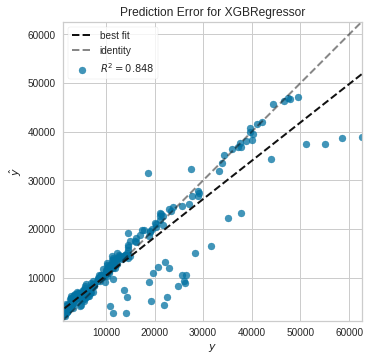

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2492ba7550>,
                estimator=XGBRegressor(learning_rate=0.01, n_estimators=500,
                                       random_state=42, silent=True,
                                       subsample=0.5))


In [ ]:
# gerando a visualização gráfica de Prediction Error
print(prediction_error(ml_model, X_train, y_train, X_test, y_test))

**Yellowbrick: Residuals Plot**

Um resíduo é a diferença entre o valor observado da variável real e o valor previsto pelo modelo, ou seja, o erro da previsão. O `residuals_plot` nos mostra a diferença entre os resíduos no eixo vertical e a variável dependente no eixo horizontal, permitindo detectar regiões dentro do alvo que podem ser suscetíveis a mais ou menos erros.

Se os pontos estiverem aleatoriamente dispersos em torno do eixo horizontal, um modelo de regressão linear geralmente é adequado para os dados, caso contrário, um modelo não linear é mais apropriado. 

O exemplo a seguir mostra uma distribuição bastante aleatória e uniforme dos resíduos em relação ao alvo em duas dimensões. Isso parece indicar que nosso modelo linear está funcionando bem.

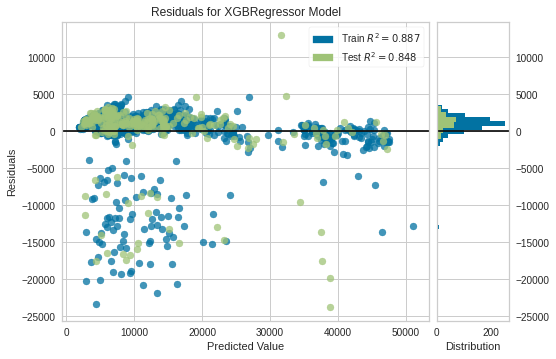

ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2492d33650>,
              estimator=XGBRegressor(learning_rate=0.01, n_estimators=500,
                                     random_state=42, silent=True,
                                     subsample=0.5),
              line_color=None, test_alpha=None, test_color=None,
              train_alpha=None, train_color=None)


In [ ]:
# gerando a visualização gráfica de Residuals Plot
print(residuals_plot(ml_model, X_train, y_train, X_test, y_test))

###**Feature importance**

Existem várias maneiras diferentes de aumentar a compreensão do seu modelo e a *feature importance* é uma delas. A *feature importance* ajuda a estimar o quanto cada recurso de seus dados contribuiu para a previsão do modelo. 

Depois de realizar testes de importância de recursos, você pode descobrir quais recursos estão causando o maior impacto na tomada de decisões do seu modelo. Em outras palavras, esta análise mede o poder preditivo de cada variável.

Para este estudo, usarei a biblioteca *shap*. Esta é uma biblioteca muito poderosa em *feature importance*. Para mais informações, acesse esse o [*link*](https://towardsdatascience.com/a-novel-approach-to-feature-importance-shapley-additive-explanations-d18af30fc21b).



**Summary Plot**

Para obter uma visão geral de quais recursos são mais importantes para um modelo, podemos plotar os valores *shap* para cada recurso. O gráfico abaixo classifica os recursos pela soma das magnitudes do valor *shap* em todas as amostras e usa os valores *shap* para mostrar a distribuição dos impactos que cada recurso tem na saída do modelo. A cor representa o valor do recurso (vermelho é alto, azul é baixo).

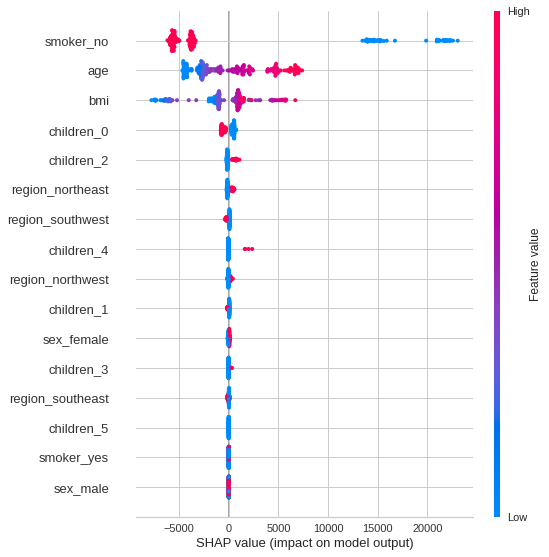

In [ ]:
# gerando o gráfico
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Summary Bar Plot**

Também podemos simplesmente tomar o valor absoluto médio dos valores *shap* de cada recurso para obter um gráfico de barras padrão. Este gráfico pode ser gerado através da função `plot_type="bar"`; esta função produz barras empilhadas de várias classes, priorizando-as por relevância:

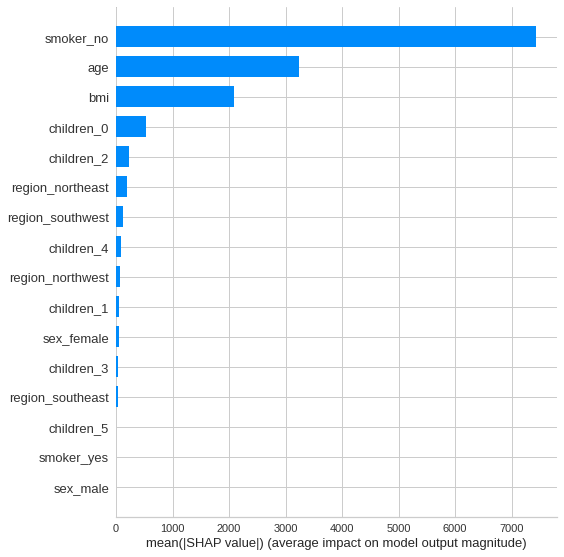

In [ ]:
# gerando o gráfico
shap.summary_plot(shap_values, X_test, plot_type="bar")

Conforme podemos ver, esses gráficos nos dizem quais recursos são os mais importantes para um modelo e, portanto, podemos tornar nossos modelos de aprendizado de máquina mais interpretáveis e explicativos.

# Finalizando o modelo

**Análize dos dados gerado pelo modelo**

Aqui podemos visualizar tanto os dados gerados pelo modelo de regressão desenvolvido neste estudo como os dados reais de custo do seguro de vida do nosso *dataset* original. Neste *dataframe* conseguimos fazer uma comparação visual destes dados.

In [ ]:
# gerando novo dataframe de output comparativo
output = pd.DataFrame({'predict_charges': y_pred, 'real_charges': y_test})
output

,predict_charges,real_charges
299,10040.800781,9249.49520
802,38101.070312,38792.68560
51,6702.509277,3579.82870
399,2799.015137,1631.66830
370,13864.416016,13415.03810
...,...,...
1187,22692.638672,21771.34230
529,3012.950195,1708.00140
577,38771.417969,58571.07448
665,9304.071289,8703.45600


**Salvando o Modelo**

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(ml_model, 'ml_model_regression_insurance.pkl')

['ml_model_regression_insurance.pkl']

**Carregando um Modelo**

Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [ ]:
# carregando o modelo do arquivo
ml_model_from_joblib = joblib.load('ml_model_regression_insurance.pkl')
 
# usando o modelo carregado para fazer predições
ml_model_from_joblib.predict(X_test)

array([10040.801 , 38101.07  ,  6702.5093,  2799.0151, 13864.416 ,
       10294.049 ,  6299.908 ,  5345.7295,  8378.772 , 42056.168 ,
       15122.133 , 15104.467 , 12613.936 , 14094.361 ,  4396.0625,
       12759.843 , 10428.865 , 23319.154 , 31594.78  ,  6957.309 ,
       45636.73  ,  4215.0913, 13548.845 , 13715.446 ,  9851.182 ,
        3828.1262,  3646.086 , 14620.859 ,  4299.94  ,  9665.321 ,
        4542.678 , 12725.819 , 21948.834 , 14609.551 , 21044.395 ,
       12607.889 ,  4988.9136, 14229.557 , 19864.504 , 37536.402 ,
        8405.779 , 13683.047 , 19785.623 ,  6747.513 , 14256.279 ,
        6640.0044, 12080.971 , 32321.41  , 11854.708 ,  3008.6873,
        7909.2295, 37560.082 ,  9936.424 , 17268.36  ,  4861.4023,
        6014.7295, 11584.763 , 46887.402 , 15655.08  ,  9130.021 ,
        5675.653 ,  4527.7886,  7491.086 , 46255.137 ,  4065.5664,
        8684.602 , 12276.824 , 13285.059 , 15143.182 ,  6876.996 ,
       19537.156 ,  8355.617 ,  6297.486 , 34431.58  ,  6475.0